In [12]:
# Импорт библиотек
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


# Функции, которые используются в ноутбуке

In [2]:
# функция для изучения данных
def total_describe(data, info=True, describe=True, head=True):
    if info:
        print('Общая информация:')
        print()
        print(data.info())
        print('____________________________________________________________________')
        print()
    if describe:
        print('Описание числовых значений:')
        print()
        print(data.describe(include='all'))
        print('____________________________________________________________________')
        print()
    if head:
        print('Первые несколько строк:')
        return(data.head())

# 1 способ создания данных

In [3]:

# Устанавливаем seed для воспроизводимости
np.random.seed(42)
n = 100
noise = 3*np.random.uniform(n)
x11 = np.random.normal(loc=100000, scale=1000.0, size=n)
x12 = np.random.power(2)
# x13 = np.random.normal(loc=0.0, scale=1.0, size=n)
# x14 = np.random.normal(loc=0.0, scale=1.0, size=n)

x2 = 2 * x11 + np.random.rand(n)
# x3 = np.random.rand(n)
# x4 = np.random.rand(n)
# x5 = np.random.rand(n)
# x3 = 3 * x12 + np.random.rand(n) * 0.1
# x4 = 4 * x3 + np.random.rand(n) * 0.1
# x5 = 6 * x14 + np.random.rand(n) * 0.1

# Целевая переменная y зависит от x1 и x2 с добавлением случайного шума
# y = 3 * x11 + 5 * x12 + x13 + x14 + noise
y = 3 * x11 + x2 + x12 + noise


# Создание DataFrame из данных
df = pd.DataFrame({'x11': x11,
                  #  'x12': x2, 'x13':x13, 'x14':x14,
                   'x2':x2,
                  #  'x3':x3, 'x4':x4, 'x5':x5,
                   'y': y
                   })

# Вывод первых пяти строк данных
df.head()

,x11,x2,y
0,98888.119882,197776.603394,494630.563086
1,100318.902185,200638.776151,501785.082752
2,100279.041292,200559.045032,501585.768955
3,101010.515285,202021.282352,505242.428253
4,99419.121866,198838.740980,497285.706625


# 2 способ создания данных

In [4]:
# генерируем данные для X и y
N = 1
X, y = make_regression(n_samples=10000,n_features = N, noise=100, random_state=0)
# Create a DataFrame from the X array
list_features=['feature'+str(i) for i in range(1, N+1)]

df = pd.DataFrame(X, columns=list_features)
df['feature_new'] = df['feature1'].map(lambda x: x*2+np.random.rand())
df.head()

,feature1,feature_new
0,0.582624,1.810721
1,-1.310930,-2.444750
2,-0.762516,-0.584574
3,0.177450,1.308829
4,-1.306872,-1.698879


# Подготовка данных

In [5]:
features = list(df.columns)
target = 'y'
try:
  features.remove(target)
except Exception as e:
  print(e)

list.remove(x): x not in list


In [6]:
X = df[features]
try:
  y = df[target]
except Exception as e:
  print(e)

'y'


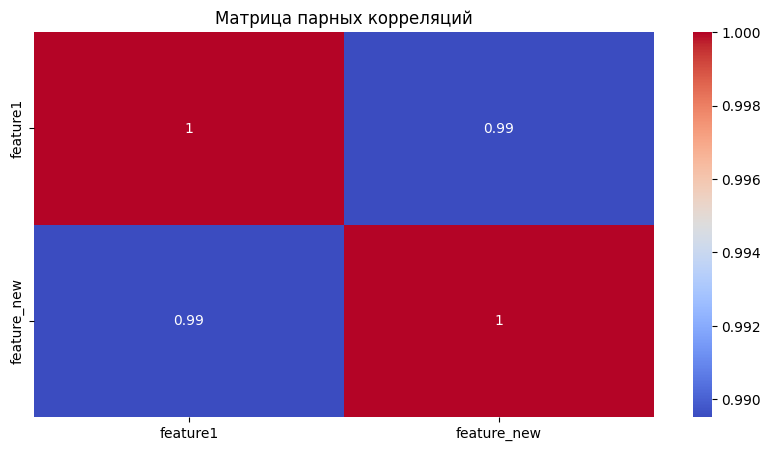

In [7]:
# Расчет матрицы парных корреляций

correlation_matrix = X.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [8]:
# разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Нормализация признаков для лучшей сходимости. Рассказать про важность нормализации именно для регуляризации
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# задаем интервал перебора для alpha
# альфа зависит от размера выборки

start = 0.0      # Начальное значение диапазона
stop = 1000       # Конечное значение диапазона (не включается в результат)
step = 10       # Шаг между значениями
float_range = np.arange(start, stop, step)
print(float_range)

[ 80  90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250
 260 270 280 290]


# RIDGE  регрессия

In [15]:
X_train_scaled

array([[ 1.16904643,  1.11905701],
       [-0.32534471, -0.42700228],
       [ 0.01477098, -0.1738131 ],
       ...,
       [ 0.1054514 ,  0.35664454],
       [ 0.0484644 ,  0.04881249],
       [ 1.44501268,  1.37798224]])

In [18]:
y_test

array([ 192.67662371,   33.08916165,   42.72502236, ...,    7.96002549,
          4.34254451, -238.24287007])

In [17]:
y_pred_test

array([ 9.29453689,  1.65269832,  2.08341664, ..., -0.92263968,
        8.07951377, -5.57326264])

In [85]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []
rmse_list = []

for alpha in float_range:
  if alpha == 0:
    model = LinearRegression() # когда alpha 0 и не задана, частный случай
  else:
    model = Ridge(alpha=alpha, max_iter=1000) # alpha — величина регуляризации
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mae = mean_absolute_error(y_test, y_pred_test )
  mae_list.append(mae)
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  rmse = root_mean_squared_error(y_test, y_pred_test )
  rmse_list.append(rmse)
  R_2_score = r2_score(y_test, y_pred_test)
  R_2_scores.append(R_2_score)
  print(f"R^2 score on test data: {R_2_score}, RMSE {rmse}, alpha {alpha}" )
  # print("R^2 score on test data:", model.score(X_test_scaled, y_test))

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  print(coefficients)
  avg_coefficients.append(coefficients)
  # print(avg_coefficients)


R^2 score on test data: 0.00895069147530414, RMSE 101.72108041896944, alpha 80
[10.32335249 -2.5254871 ]
R^2 score on test data: 0.00897374978469856, RMSE 101.7198970622145, alpha 90
[ 9.92767075 -2.13536871]
R^2 score on test data: 0.00899334033896293, RMSE 101.71889166048526, alpha 100
[ 9.5772807  -1.79053409]
R^2 score on test data: 0.009010108731527633, RMSE 101.71803108628768, alpha 110
[ 9.26477887 -1.48357976]
R^2 score on test data: 0.009024551619212784, RMSE 101.71728985397831, alpha 120
[ 8.9842921 -1.2086326]
R^2 score on test data: 0.009037056933001275, RMSE 101.71664805672573, alpha 130
[ 8.73110161 -0.96097383]
R^2 score on test data: 0.00904793181959096, RMSE 101.71608993290566, alpha 140
[ 8.50137262 -0.7367687 ]
R^2 score on test data: 0.009057422446246077, RMSE 101.71560284993932, alpha 150
[ 8.29195664 -0.53286873]
R^2 score on test data: 0.009065728290580166, RMSE 101.7151765710847, alpha 160
[ 8.1002445  -0.34666477]
R^2 score on test data: 0.009073012618144638, R

In [24]:
avg_coefficients = np.transpose(avg_coefficients)
avg_coefficients

array([[17.33709591, -9.49443609],
       [15.7278503 , -7.8908179 ],
       [14.4621834 , -6.63077037],
       [13.44052069, -5.61471896],
       [12.598376  , -4.77817754],
       [11.89214721, -4.077544  ],
       [11.29129524, -3.48227929],
       [10.7737929 , -2.97035621],
       [10.32335249, -2.5254871 ],
       [ 9.92767075, -2.13536871],
       [ 9.5772807 , -1.79053409],
       [ 9.26477887, -1.48357976],
       [ 8.9842921 , -1.2086326 ],
       [ 8.73110161, -0.96097383],
       [ 8.50137262, -0.7367687 ],
       [ 8.29195664, -0.53286873],
       [ 8.1002445 , -0.34666477],
       [ 7.92405562, -0.17597625],
       [ 7.76155348, -0.01896667],
       [ 7.61118032,  0.12592171],
       [ 7.4716062 ,  0.2600188 ],
       [ 7.34168883,  0.38446691],
       [ 7.22044157,  0.50025263],
       [ 7.10700782,  0.60823256],
       [ 7.00064027,  0.70915399],
       [ 6.90068401,  0.80367182],
       [ 6.80656266,  0.89236239],
       [ 6.71776697,  0.97573496],
       [ 6.63384531,

In [28]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))


fig.add_trace(go.Scatter(x=x, y=rmse_list,
                mode='lines',
                name='rmse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 100, где достигается наименьшая ошибка

# LASSO  регрессия

In [29]:
start = 0.0      # Начальное значение диапазона
stop = 0.2     # Конечное значение диапазона (не включается в результат)
step = 0.001       # Шаг между значениями

float_range = np.arange(start, stop, step)


In [33]:
avg_coefficients

array([[17.33709591, 17.24119392, 17.14530081, 17.04938994, 16.95349467,
        16.85759906, 16.76171148, 16.66579492, 16.56987615, 16.47398628,
        16.37801525, 16.28211432, 16.18632044, 16.09029793, 15.99440238,
        15.89845729, 15.80269093, 15.70665345, 15.61081877, 15.51495383,
        15.41905728, 15.32312776, 15.22716383, 15.13149493, 15.03547477,
        14.93941647, 14.84369492, 14.74757474, 14.65181951, 14.55605274,
        14.45984385, 14.36404185, 14.26822812, 14.17240272, 14.07656575,
        13.98071732, 13.8848576 , 13.78845513, 13.69255934, 13.59665274,
        13.50073562, 13.4053977 , 13.30947567, 13.2135446 , 13.11760499,
        13.02165745, 12.9257026 , 12.82974119, 12.733774  , 12.63780192,
        12.54182591, 12.44584702, 12.34986642, 12.25464738, 12.15868309,
        12.06272115, 11.96676317, 11.87081084, 11.77486603, 11.67893076,
        11.58300718, 11.48709764, 11.39120465, 11.29533091, 11.19947935,
        11.10365309, 11.00785547, 10.9120901 , 10.8

In [64]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []
rmse_list = []

# Нормализация признаков для лучшей сходимости.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Lasso(alpha=alpha, max_iter=1000)
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mae = mean_absolute_error(y_test, y_pred_test )
  mae_list.append(mae)
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  rmse = root_mean_squared_error(y_test, y_pred_test )
  rmse_list.append(rmse)
  R_2_score = model.score(X_test, y_test)
  R_2_scores.append(R_2_score)
  # print("R^2 score on test data:", R_2_score)

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  avg_coefficient = np.mean(coefficients)
  avg_coefficients.append(coefficients)
  print(f"Coefficients (weights) with L1 regularization: {alpha} {rmse}")
  print(coefficients)
avg_coefficients = np.transpose(avg_coefficients)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names



Coefficients (weights) with L1 regularization: 0.0 101.74869315415332
[17.33709591 -9.49443609]
Coefficients (weights) with L1 regularization: 0.001 101.74823263784599
[17.24119392 -9.39854124]
Coefficients (weights) with L1 regularization: 0.002 101.74777403391558
[17.14530081 -9.30265518]
Coefficients (weights) with L1 regularization: 0.003 101.74731722257421
[17.04938994 -9.20675156]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names



Coefficients (weights) with L1 regularization: 0.004 101.74686235360701
[16.95349467 -9.11086336]
Coefficients (weights) with L1 regularization: 0.005 101.7464093553837
[16.85759906 -9.01497482]
Coefficients (weights) with L1 regularization: 0.006 101.74595826498404
[16.76171148 -8.91909424]
Coefficients (weights) with L1 regularization: 0.007 101.74550891902254
[16.66579492 -8.82318499]
Coefficients (weights) with L1 regularization: 0.008 101.74506143645884
[16.56987615 -8.72727353]
Coefficients (weights) with L1 regularization: 0.009000000000000001 101.74461595331853
[16.47398628 -8.63139069]
Coefficients (weights) with L1 regularization: 0.01 101.74417198971523
[16.37801525 -8.53542752]
Coefficients (weights) with L1 regularization: 0.011 101.74373020468234
[16.28211432 -8.43953374]
Coefficients (weights) with L1 regularization: 0.012 101.74329075318062
[16.18632044 -8.34374587]
Coefficients (weights) with L1 regularization: 0.013000000000000001 101.74285219021625
[16.09029793 -8.24

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.014 101.74241604639643
[15.99440238 -8.1518433 ]
Coefficients (weights) with L1 regularization: 0.015 101.74198156465803
[15.89845729 -8.05590581]
Coefficients (weights) with L1 regularization: 0.016 101.74154971308175
[15.80269093 -7.96014517]
Coefficients (weights) with L1 regularization: 0.017 101.74111858795675
[15.70665345 -7.86411626]
Coefficients (weights) with L1 regularization: 0.018000000000000002 101.74069019051223
[15.61081877 -7.76828802]
Coefficients (weights) with L1 regularization: 0.019 101.74026353711442
[15.51495383 -7.67242983]
Coefficients (weights) with L1 regularization: 0.02 101.7398386240022
[15.41905728 -7.57654038]
Coefficients (weights) with L1 regularization: 0.021 101.73941544733137
[15.32312776 -7.48061829]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.022 101.73899400317839
[15.22716383 -7.38466216]
Coefficients (weights) with L1 regularization: 0.023 101.73857564175131
[15.13149493 -7.28899795]
Coefficients (weights) with L1 regularization: 0.024 101.73815771356126
[15.03547477 -7.19298618]
Coefficients (weights) with L1 regularization: 0.025 101.73774150832443
[14.93941647 -7.09693667]
Coefficients (weights) with L1 regularization: 0.026000000000000002 101.73732854073545
[14.84369492 -7.00122037]
Coefficients (weights) with L1 regularization: 0.027 101.7369158387278
[14.74757474 -6.90510963]
Coefficients (weights) with L1 regularization: 0.028 101.73650647639184
[14.65181951 -6.80936001]
Coefficients (weights) with L1 regularization: 0.029 101.73609893553252
[14.55605274 -6.71359896]
Coefficients (weights) with L1 regularization: 0.03 101.73569151321747
[14.45984385 -6.61740044]
Coefficients (weights) with L1 regularization: 0.031 101.73528757802094
[14.36404185 -6.52160454]
Coeffic

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.035 101.73369008027001
[13.98071732 -6.13830561]
Coefficients (weights) with L1 regularization: 0.036000000000000004 101.73329527222013
[13.8848576 -6.0424526]
Coefficients (weights) with L1 regularization: 0.037 101.7329002619461
[13.78845513 -5.94606253]
Coefficients (weights) with L1 regularization: 0.038 101.73250907059365
[13.69255934 -5.85017383]
Coefficients (weights) with L1 regularization: 0.039 101.73211971135343
[13.59665274 -5.75427441]
Coefficients (weights) with L1 regularization: 0.04 101.73173218608287
[13.50073562 -5.6583646 ]
Coefficients (weights) with L1 regularization: 0.041 101.73134870291116
[13.4053977 -5.5630279]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.042 101.73096489601481
[13.30947567 -5.46711324]
Coefficients (weights) with L1 regularization: 0.043000000000000003 101.73058292975303
[13.2135446  -5.37118961]
Coefficients (weights) with L1 regularization: 0.044 101.73020280659945
[13.11760499 -5.27525755]
Coefficients (weights) with L1 regularization: 0.045 101.72982452921407
[13.02165745 -5.17931763]
Coefficients (weights) with L1 regularization: 0.046 101.72944810045321
[12.9257026  -5.08337049]
Coefficients (weights) with L1 regularization: 0.047 101.72907352337984
[12.82974119 -4.98741685]
Coefficients (weights) with L1 regularization: 0.048 101.72870080127441
[12.733774   -4.89145749]
Coefficients (weights) with L1 regularization: 0.049 101.72832993764612
[12.63780192 -4.79549329]
Coefficients (weights) with L1 regularization: 0.05 101.72796093624471
[12.54182591 -4.6995252 ]
Coefficients (weights) with L1 regularization: 0.051000000000000004 101.72759380107276
[12.44584702 -4.6

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.056 101.72578907248327
[11.96676317 -4.12450167]
Coefficients (weights) with L1 regularization: 0.057 101.72543327241743
[11.87081084 -4.02855702]
Coefficients (weights) with L1 regularization: 0.058 101.7250793736741
[11.77486603 -3.93261981]
Coefficients (weights) with L1 regularization: 0.059000000000000004 101.72472738265277
[11.67893076 -3.83669203]
Coefficients (weights) with L1 regularization: 0.06 101.72437730613453
[11.58300718 -3.74077583]
Coefficients (weights) with L1 regularization: 0.061 101.72402915130023
[11.48709764 -3.64487351]
Coefficients (weights) with L1 regularization: 0.062 101.7236829257494
[11.39120465 -3.54898757]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.063 101.72333863751992
[11.29533091 -3.45312069]
Coefficients (weights) with L1 regularization: 0.064 101.72299629510844
[11.19947935 -3.35727574]
Coefficients (weights) with L1 regularization: 0.065 101.72265590749171
[11.10365309 -3.26145583]
Coefficients (weights) with L1 regularization: 0.066 101.7223174841487
[11.00785547 -3.16566426]
Coefficients (weights) with L1 regularization: 0.067 101.72198103508372
[10.9120901  -3.06990461]
Coefficients (weights) with L1 regularization: 0.068 101.72164343270728
[10.81538619 -2.97321626]
Coefficients (weights) with L1 regularization: 0.069 101.72131095136736
[10.71968718 -2.87752226]
Coefficients (weights) with L1 regularization: 0.07 101.72098048112196
[10.62403376 -2.78187338]
Coefficients (weights) with L1 regularization: 0.07100000000000001 101.72065203458772
[10.52843076 -2.68627439]
Coefficients (weights) with L1 regularization: 0.07200000000000001 101.72032562505007
[10.43288333 -2.5907

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.077 101.71873378265752
[ 9.95918459 -2.11700635]
Coefficients (weights) with L1 regularization: 0.078 101.71841983233844
[ 9.86409156 -2.02191196]
Coefficients (weights) with L1 regularization: 0.079 101.71810801481536
[ 9.76909492 -1.92691297]
Coefficients (weights) with L1 regularization: 0.08 101.71779834868873
[ 9.67420276 -1.83201735]
Coefficients (weights) with L1 regularization: 0.081 101.71749085348148
[ 9.57942367 -1.73723361]
Coefficients (weights) with L1 regularization: 0.082 101.7171855496786
[ 9.48476679 -1.6425708 ]
Coefficients (weights) with L1 regularization: 0.083 101.71688245876838
[ 9.39024185 -1.54803854]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.084 101.71657895396675
[ 9.29494943 -1.45274687]
Coefficients (weights) with L1 regularization: 0.085 101.71628043612228
[ 9.20074116 -1.35852796]
Coefficients (weights) with L1 regularization: 0.08600000000000001 101.71598167567475
[ 9.10581899 -1.26360265]
Coefficients (weights) with L1 regularization: 0.08700000000000001 101.71568538253128
[ 9.01111784 -1.16889603]
Coefficients (weights) with L1 regularization: 0.088 101.71539162233866
[ 8.91666532 -1.07443544]
Coefficients (weights) with L1 regularization: 0.089 101.7150980686545
[ 8.82164047 -0.97940852]
Coefficients (weights) with L1 regularization: 0.09 101.71480734169008
[ 8.72696824 -0.88473053]
Coefficients (weights) with L1 regularization: 0.091 101.71451726393292
[ 8.63187209 -0.78963306]
Coefficients (weights) with L1 regularization: 0.092 101.71423048113708
[ 8.53730219 -0.69505631]
Coefficients (weights) with L1 regularization: 0.093 101.71394505109197
[ 8.44256065 -0.6003

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.094 101.71366157619268
[ 8.34786527 -0.50560883]
Coefficients (weights) with L1 regularization: 0.095 101.71337877084342
[ 8.2527411  -0.41048364]
Coefficients (weights) with L1 regularization: 0.096 101.7130982097407
[ 8.15776606 -0.31550601]
Coefficients (weights) with L1 regularization: 0.097 101.7128206969589
[ 8.06324532 -0.22097791]
Coefficients (weights) with L1 regularization: 0.098 101.71254484403188
[ 7.96866356 -0.12638943]
Coefficients (weights) with L1 regularization: 0.099 101.71227048804852
[ 7.87395737 -0.03167783]
Coefficients (weights) with L1 regularization: 0.1 101.71217721021077
[ 7.8423688 -0.       ]
Coefficients (weights) with L1 regularization: 0.101 101.7121992056825
[ 7.8413688 -0.       ]
Coefficients (weights) with L1 regularization: 0.10200000000000001 101.71222121086859
[ 7.8403688 -0.       ]
Coefficients (weights) with L1 regularization: 0.10300000000000001 101.71224322576903
[ 7.8393688 -0.       ]
Coeff

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.111 101.71241969468893
[ 7.8313688 -0.       ]
Coefficients (weights) with L1 regularization: 0.112 101.71244179701836
[ 7.8303688 -0.       ]
Coefficients (weights) with L1 regularization: 0.113 101.71246390906208
[ 7.8293688 -0.       ]
Coefficients (weights) with L1 regularization: 0.114 101.7124860308201
[ 7.8283688 -0.       ]
Coefficients (weights) with L1 regularization: 0.115 101.71250816229241
[ 7.8273688 -0.       ]
Coefficients (weights) with L1 regularization: 0.116 101.71253030347899
[ 7.8263688 -0.       ]
Coefficients (weights) with L1 regularization: 0.117 101.71255245437985
[ 7.8253688 -0.       ]
Coefficients (weights) with L1 regularization: 0.11800000000000001 101.71257461499496
[ 7.8243688 -0.       ]
Coefficients (weights) with L1 regularization: 0.11900000000000001 101.71259678532437
[ 7.8233688 -0.       ]
Coefficients (weights) with L1 regularization: 0.12 101.712618965368
[ 7.8223688 -0.       ]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.121 101.71264115512588
[ 7.8213688 -0.       ]
Coefficients (weights) with L1 regularization: 0.122 101.712663354598
[ 7.8203688 -0.       ]
Coefficients (weights) with L1 regularization: 0.123 101.71268556378438
[ 7.8193688 -0.       ]
Coefficients (weights) with L1 regularization: 0.124 101.71270778268497
[ 7.8183688 -0.       ]
Coefficients (weights) with L1 regularization: 0.125 101.71273001129978
[ 7.8173688 -0.       ]
Coefficients (weights) with L1 regularization: 0.126 101.71275224962882
[ 7.8163688 -0.       ]
Coefficients (weights) with L1 regularization: 0.127 101.71277449767206
[ 7.8153688 -0.       ]
Coefficients (weights) with L1 regularization: 0.128 101.71279675542951
[ 7.8143688 -0.       ]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.129 101.71281902290113
[ 7.8133688 -0.       ]
Coefficients (weights) with L1 regularization: 0.13 101.71284130008696
[ 7.8123688 -0.       ]
Coefficients (weights) with L1 regularization: 0.131 101.71286358698698
[ 7.8113688 -0.       ]
Coefficients (weights) with L1 regularization: 0.132 101.71288588360119
[ 7.8103688 -0.       ]
Coefficients (weights) with L1 regularization: 0.133 101.71290818992955
[ 7.8093688 -0.       ]
Coefficients (weights) with L1 regularization: 0.134 101.7129305059721
[ 7.8083688 -0.       ]
Coefficients (weights) with L1 regularization: 0.135 101.71295283172877
[ 7.8073688 -0.       ]
Coefficients (weights) with L1 regularization: 0.136 101.71297516719963
[ 7.8063688 -0.       ]
Coefficients (weights) with L1 regularization: 0.137 101.7129975123846
[ 7.8053688 -0.       ]
Coefficients (weights) with L1 regularization: 0.138 101.71301986728373
[ 7.8043688 -0.       ]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.139 101.71304223189699
[ 7.8033688 -0.       ]
Coefficients (weights) with L1 regularization: 0.14 101.71306460622438
[ 7.8023688 -0.       ]
Coefficients (weights) with L1 regularization: 0.14100000000000001 101.7130869902659
[ 7.8013688 -0.       ]
Coefficients (weights) with L1 regularization: 0.14200000000000002 101.71310938402151
[ 7.8003688 -0.       ]
Coefficients (weights) with L1 regularization: 0.14300000000000002 101.71313178749124
[ 7.7993688 -0.       ]
Coefficients (weights) with L1 regularization: 0.14400000000000002 101.71315420067508
[ 7.7983688 -0.       ]
Coefficients (weights) with L1 regularization: 0.145 101.713176623573
[ 7.7973688 -0.       ]
Coefficients (weights) with L1 regularization: 0.146 101.71319905618502
[ 7.7963688 -0.       ]
Coefficients (weights) with L1 regularization: 0.147 101.71322149851112
[ 7.7953688 -0.       ]
Coefficients (weights) with L1 regularization: 0.148 101.71324395055127
[ 7.7943688 

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.149 101.71326641230553
[ 7.7933688 -0.       ]
Coefficients (weights) with L1 regularization: 0.15 101.71328888377383
[ 7.7923688 -0.       ]
Coefficients (weights) with L1 regularization: 0.151 101.71331136495618
[ 7.7913688 -0.       ]
Coefficients (weights) with L1 regularization: 0.152 101.7133338558526
[ 7.7903688 -0.       ]
Coefficients (weights) with L1 regularization: 0.153 101.71335635646304
[ 7.7893688 -0.       ]
Coefficients (weights) with L1 regularization: 0.154 101.71337886678754
[ 7.7883688 -0.       ]
Coefficients (weights) with L1 regularization: 0.155 101.71340138682605
[ 7.7873688 -0.       ]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.156 101.71342391657859
[ 7.7863688 -0.       ]
Coefficients (weights) with L1 regularization: 0.157 101.71344645604515
[ 7.7853688 -0.       ]
Coefficients (weights) with L1 regularization: 0.158 101.71346900522572
[ 7.7843688 -0.       ]
Coefficients (weights) with L1 regularization: 0.159 101.7134915641203
[ 7.7833688 -0.       ]
Coefficients (weights) with L1 regularization: 0.16 101.71351413272887
[ 7.7823688 -0.       ]
Coefficients (weights) with L1 regularization: 0.161 101.71353671105143
[ 7.7813688 -0.       ]
Coefficients (weights) with L1 regularization: 0.162 101.71355929908799
[ 7.7803688 -0.       ]
Coefficients (weights) with L1 regularization: 0.163 101.71358189683852
[ 7.7793688 -0.       ]
Coefficients (weights) with L1 regularization: 0.164 101.713604504303
[ 7.7783688 -0.       ]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.165 101.71362712148148
[ 7.7773688 -0.       ]
Coefficients (weights) with L1 regularization: 0.166 101.7136497483739
[ 7.7763688 -0.       ]
Coefficients (weights) with L1 regularization: 0.167 101.71367238498027
[ 7.7753688 -0.       ]
Coefficients (weights) with L1 regularization: 0.168 101.7136950313006
[ 7.7743688 -0.       ]
Coefficients (weights) with L1 regularization: 0.169 101.71371768733488
[ 7.7733688 -0.       ]
Coefficients (weights) with L1 regularization: 0.17 101.71374035308307
[ 7.7723688 -0.       ]
Coefficients (weights) with L1 regularization: 0.171 101.71376302854519
[ 7.7713688 -0.       ]
Coefficients (weights) with L1 regularization: 0.17200000000000001 101.71378571372124
[ 7.7703688 -0.       ]
Coefficients (weights) with L1 regularization: 0.17300000000000001 101.71380840861119
[ 7.7693688 -0.       ]
Coefficients (weights) with L1 regularization: 0.17400000000000002 101.71383111321505
[ 7.7683688 -0.       ]
C

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.176 101.71387655156448
[ 7.7663688 -0.       ]
Coefficients (weights) with L1 regularization: 0.177 101.71389928531002
[ 7.7653688 -0.       ]
Coefficients (weights) with L1 regularization: 0.178 101.71392202876946
[ 7.7643688 -0.       ]
Coefficients (weights) with L1 regularization: 0.179 101.71394478194276
[ 7.7633688 -0.       ]
Coefficients (weights) with L1 regularization: 0.18 101.71396754482993
[ 7.7623688 -0.       ]
Coefficients (weights) with L1 regularization: 0.181 101.71399031743097
[ 7.7613688 -0.       ]
Coefficients (weights) with L1 regularization: 0.182 101.71401309974584
[ 7.7603688 -0.       ]
Coefficients (weights) with L1 regularization: 0.183 101.71403589177459
[ 7.7593688 -0.       ]
Coefficients (weights) with L1 regularization: 0.184 101.71405869351717
[ 7.7583688 -0.       ]
Coefficients (weights) with L1 regularization: 0.185 101.71408150497358
[ 7.7573688 -0.       ]
Coefficients (weights) with L1 regulariza

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, 

Coefficients (weights) with L1 regularization: 0.187 101.71412715702789
[ 7.7553688 -0.       ]
Coefficients (weights) with L1 regularization: 0.188 101.71414999762577
[ 7.7543688 -0.       ]
Coefficients (weights) with L1 regularization: 0.189 101.71417284793746
[ 7.7533688 -0.       ]
Coefficients (weights) with L1 regularization: 0.19 101.71419570796296
[ 7.7523688 -0.       ]
Coefficients (weights) with L1 regularization: 0.191 101.71421857770224
[ 7.7513688 -0.       ]
Coefficients (weights) with L1 regularization: 0.192 101.71424145715531
[ 7.7503688 -0.       ]
Coefficients (weights) with L1 regularization: 0.193 101.7142643463222
[ 7.7493688 -0.       ]
Coefficients (weights) with L1 regularization: 0.194 101.71428724520283
[ 7.7483688 -0.       ]
Coefficients (weights) with L1 regularization: 0.195 101.71431015379723
[ 7.7473688 -0.       ]
Coefficients (weights) with L1 regularization: 0.196 101.7143330721054
[ 7.7463688 -0.       ]
Coefficients (weights) with L1 regularizati

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but Lasso was fitted without feature names



In [32]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))
fig.add_trace(go.Scatter(x=x, y=rmse_list,
                mode='lines',
                name='rmse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 0.1, где достигается наименьшая ошибка

# Сравним как работает линейная регрессия и регрессии с регуляризацией для оптимального значения параметра регуляризации

In [65]:
# построим линейную регрессию
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )
rmse_test = root_mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )
rmse_train = root_mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [38]:
model.intercept_

-1.2639155750313074

In [39]:
mse_test, mse_train

(10352.796558578046, 9869.831044131315)

In [40]:
rmse_test, rmse_train

(101.74869315415332, 99.3470233279856)

In [41]:
coefficients

array([17.33709591, -9.49443609])

мы получили модель y = -1.2639155750313078 + 17.33709591 * feature1 - 9.49443609 * feature_new

В данных наблюдается мультиколлинеарность, возможно по этой причине коэффициенты слишком высокие


Проведем регуляризацию L1 и L2






In [66]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg_lasso = Lasso(alpha=0.1, max_iter=1000) # alpha — величина регуляризации

In [67]:
# обучение
model_reg_lasso.fit(X_train_scaled, y_train)
y_pred_test_lasso = model_reg_lasso.predict(X_test_scaled)
y_pred_train_lasso = model_reg_lasso.predict(X_train_scaled)

mse_test_lasso = mean_squared_error(y_test, y_pred_test )
rmse_test_lasso = root_mean_squared_error(y_test, y_pred_test )

mse_train_lasso = mean_squared_error(y_train, y_pred_train )
rmse_train_lasso = root_mean_squared_error(y_train, y_pred_train )

coefficients_lasso = model_reg_lasso.coef_

In [68]:
mse_test_lasso, mse_train_lasso

(10352.796558578046, 9869.831044131315)

In [69]:
rmse_test_lasso, rmse_train_lasso

(101.74869315415332, 99.3470233279856)

In [70]:
model_reg_lasso.intercept_

-1.2639155750313076

In [71]:
model_reg_lasso.coef_

array([ 7.8423688, -0.       ])

ТО есть мы получили модель y = -1.2639155750313076 + 7.8423688 * feature1 - 0. * feature_new

y = -1.2639155750313076 + 7.8423688 * feature_new

In [86]:
# построим регрессию гребневую L2 с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg_ridge = Ridge(alpha=100, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg_ridge.fit(X_train_scaled, y_train)
y_pred_test_ridge = model_reg_ridge.predict(X_test_scaled)
y_pred_train_ridge = model_reg_ridge.predict(X_train_scaled)

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge )
rmse_test_ridge = root_mean_squared_error(y_test, y_pred_test_ridge )

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge )
rmse_train_ridge = root_mean_squared_error(y_train, y_pred_train_ridge )

coefficients_ridge = model_reg_ridge.coef_

In [87]:
mse_test_ridge, mse_train_ridge

(10346.732920637536, 9871.089787382929)

In [88]:
rmse_test_ridge, rmse_train_ridge

(101.71889166048526, 99.35335820888456)

In [90]:
model_reg_ridge.intercept_

-1.2639155750313076

In [91]:
coefficients_ridge

array([ 9.5772807 , -1.79053409])

ТО есть мы получили модель y = -1.2639155750313078 + 9.5772807 * feature1 - 1.79053409 * feature_new

Модель с регуляризацией L1 занулила коэффициент при feature1, модель с L2 регуляризацией снизила коэффициент

# ElasticNet

In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.00005, 0.0005, 0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]
}

elastic_net = GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=10)

In [96]:
elastic_net

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [5e-05, 0.0005, 0.001, 0.01, 0.05, 0.06, 0.08,
                                   1, 2, 3],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      1]},
             scoring='neg_mean_squared_error')

In [97]:
elastic_net.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [5e-05, 0.0005, 0.001, 0.01, 0.05, 0.06, 0.08,
                                   1, 2, 3],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      1]},
             scoring='neg_mean_squared_error')

In [98]:
elastic_net.best_params_

{'alpha': 0.01, 'l1_ratio': 0.6}

In [99]:
elastic_net.best_score_

-9878.78626134223

In [100]:
# построим регрессию гребневую L2 с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg_elastic = ElasticNet(alpha=0.01, l1_ratio=0.6, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg_elastic.fit(X_train_scaled, y_train)
y_pred_test_elastic = model_reg_elastic.predict(X_test_scaled)
y_pred_train_elastic = model_reg_elastic.predict(X_train_scaled)

mse_test_elastic = mean_squared_error(y_test, y_pred_test_ridge )
rmse_test_elastic = root_mean_squared_error(y_test, y_pred_test_ridge )

mse_train_elastic = mean_squared_error(y_train, y_pred_train_ridge )
rmse_train_elastic = root_mean_squared_error(y_train, y_pred_train_ridge )

coefficients_elastic = model_reg_elastic.coef_

In [101]:
mse_train_elastic, mse_test_elastic

(9871.089787382929, 10346.732920637536)

In [102]:
rmse_train_elastic, rmse_test_elastic

(99.35335820888456, 101.71889166048526)

In [104]:
model_reg_elastic.intercept_

-1.2639155750313074

In [103]:
model_reg_elastic.coef_

array([13.21213815, -5.38525691])

ТО есть мы получили модель y = -1.2639155750313078 + 13.21213815 * feature1 - 5.38525691 * feature_new